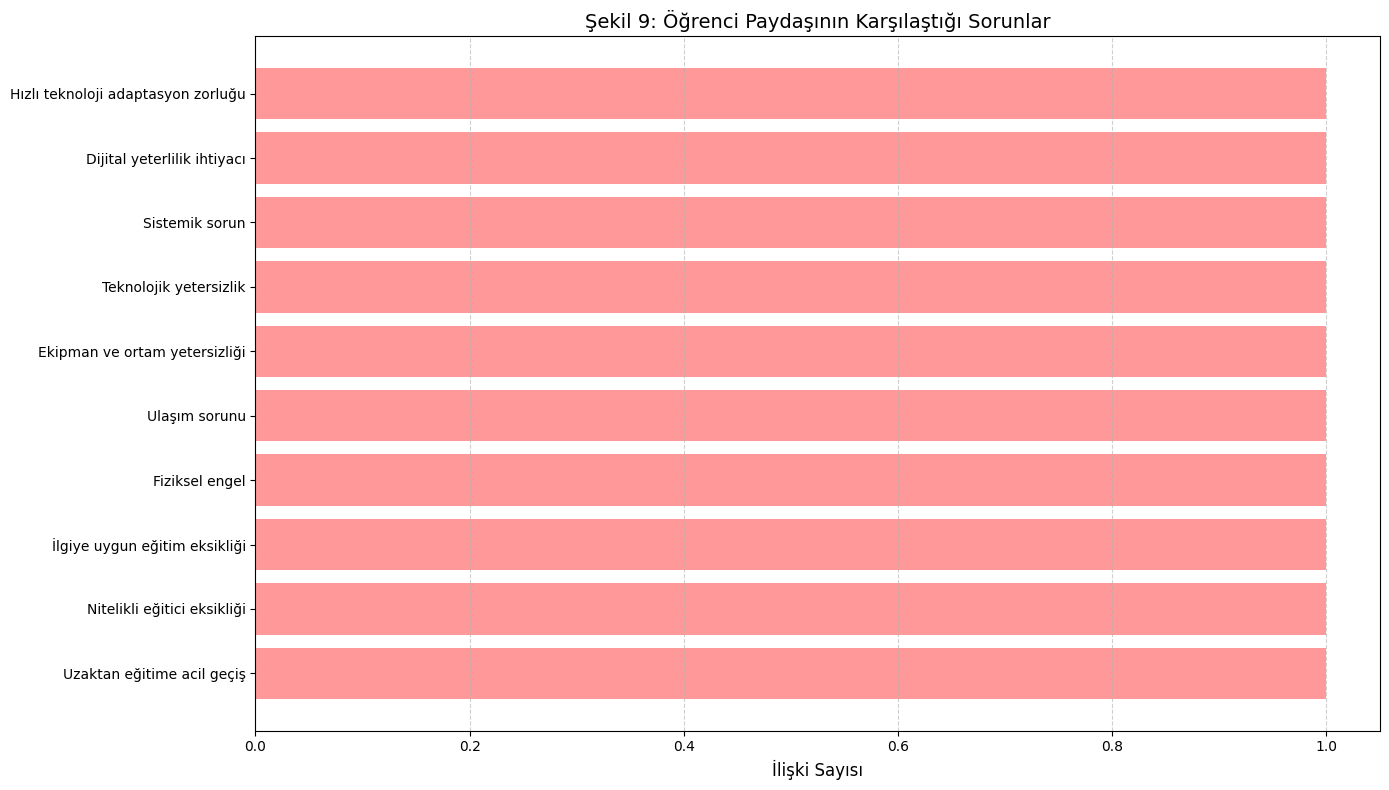

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Veri hazırlama
problems = [
    "rapid technology adoption challenge", "need for digital competency improvement", 
    "systemic problem", "technological inadequacy", "equipment and environment inadequacy",
    "transportation problem", "physical disability", "lack of training matching student interest",
    "lack of qualified trainer", "emergency transition to distance education"
]

# Problem adlarını kısaltma
short_names = [
    "Hızlı teknoloji adaptasyon zorluğu", "Dijital yeterlilik ihtiyacı", 
    "Sistemik sorun", "Teknolojik yetersizlik", "Ekipman ve ortam yetersizliği",
    "Ulaşım sorunu", "Fiziksel engel", "İlgiye uygun eğitim eksikliği",
    "Nitelikli eğitici eksikliği", "Uzaktan eğitime acil geçiş"
]

values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # Tüm ilişki sayıları 1

# Grafiği oluştur
plt.figure(figsize=(14, 8))
bars = plt.barh(short_names[::-1], values[::-1], color='#ff9999')

# Estetik ayarlamalar
plt.xlabel('İlişki Sayısı', fontsize=12)
plt.title('Şekil 9: Öğrenci Paydaşının Karşılaştığı Sorunlar', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('student_problems.png', dpi=300, bbox_inches='tight')
plt.show()

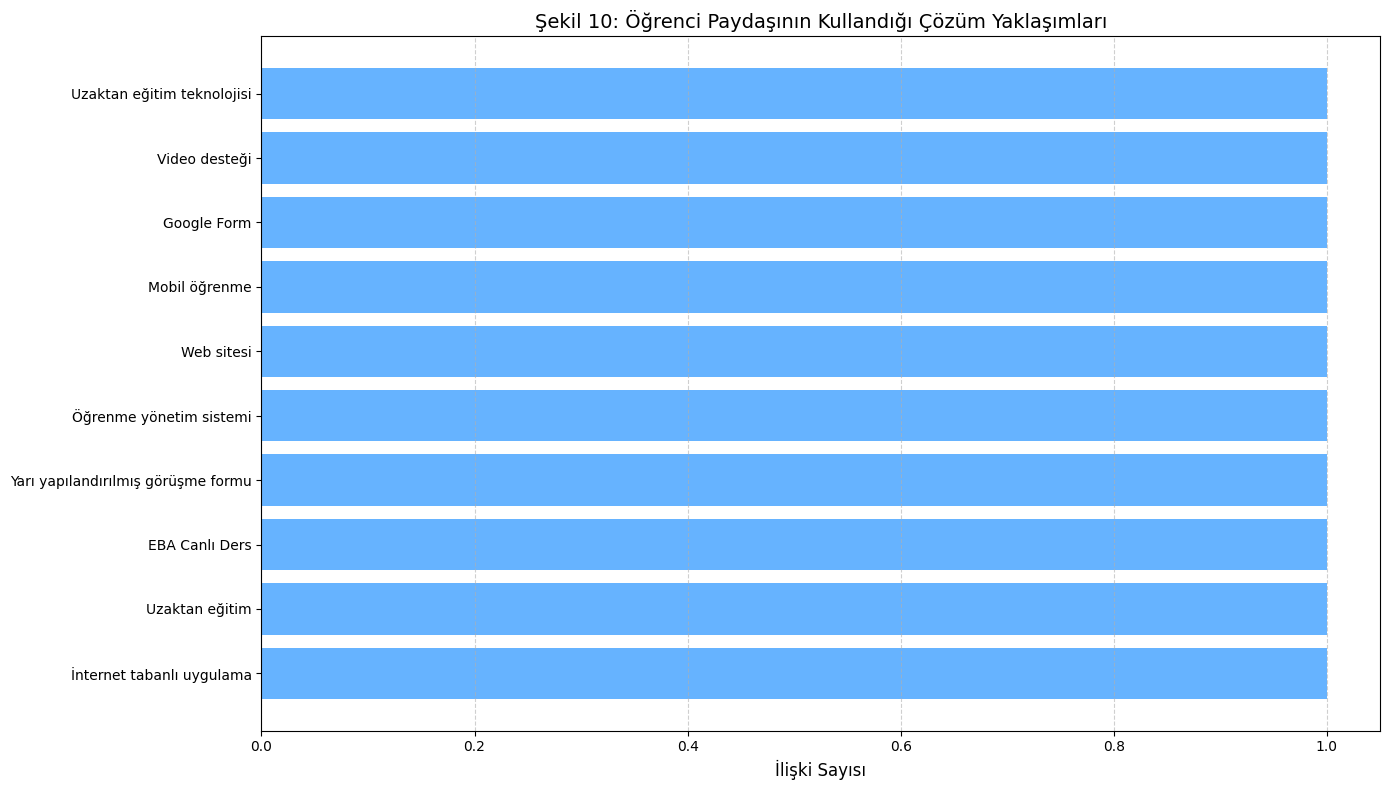

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Veri hazırlama
solutions = [
    "distance education technology", "video support", "Google Form", 
    "mobile learning", "website", "learning management system",
    "semi-structured interview form", "EBA Live Lesson", "distance education",
    "internet-based application"
]

# Çözüm adlarını kısaltma/Türkçeleştirme
short_names = [
    "Uzaktan eğitim teknolojisi", "Video desteği", "Google Form", 
    "Mobil öğrenme", "Web sitesi", "Öğrenme yönetim sistemi",
    "Yarı yapılandırılmış görüşme formu", "EBA Canlı Ders", "Uzaktan eğitim",
    "İnternet tabanlı uygulama"
]

values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # Tüm ilişki sayıları 1

# Grafiği oluştur
plt.figure(figsize=(14, 8))
bars = plt.barh(short_names[::-1], values[::-1], color='#66b3ff')

# Estetik ayarlamalar
plt.xlabel('İlişki Sayısı', fontsize=12)
plt.title('Şekil 10: Öğrenci Paydaşının Kullandığı Çözüm Yaklaşımları', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('student_solutions.png', dpi=300, bbox_inches='tight')
plt.show()

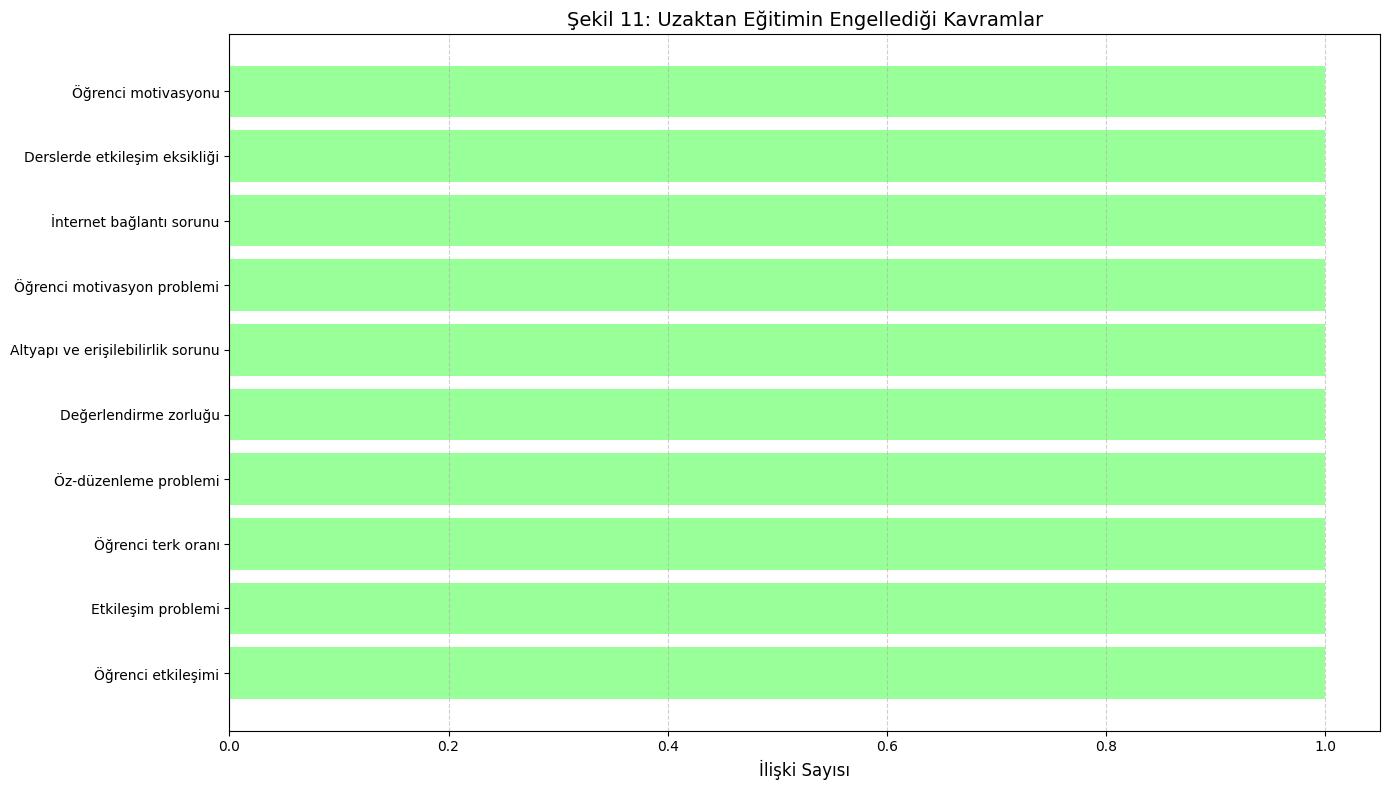

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Veri hazırlama
hindered_concepts = [
    "student motivation", "lack of interaction in lessons", "internet connectivity issue", 
    "student motivation problem", "infrastructure and accessibility problem",
    "assessment difficulty", "self-regulation problem", "student dropout",
    "interaction problem", "student interaction"
]

# Kavram adlarını kısaltma/Türkçeleştirme
short_names = [
    "Öğrenci motivasyonu", "Derslerde etkileşim eksikliği", "İnternet bağlantı sorunu", 
    "Öğrenci motivasyon problemi", "Altyapı ve erişilebilirlik sorunu",
    "Değerlendirme zorluğu", "Öz-düzenleme problemi", "Öğrenci terk oranı",
    "Etkileşim problemi", "Öğrenci etkileşimi"
]

values = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # Tüm ilişki sayıları 1

# Grafiği oluştur
plt.figure(figsize=(14, 8))
bars = plt.barh(short_names[::-1], values[::-1], color='#99ff99')

# Estetik ayarlamalar
plt.xlabel('İlişki Sayısı', fontsize=12)
plt.title('Şekil 11: Uzaktan Eğitimin Engellediği Kavramlar', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('distance_education_hindrances.png', dpi=300, bbox_inches='tight')
plt.show()